In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

%matplotlib inline

In [2]:
wine = datasets.load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names) # convert breast cancer data to Dataframe
df["target"]=wine.target

In [3]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                            int32
dtype: object

In [5]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [6]:
df.target.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

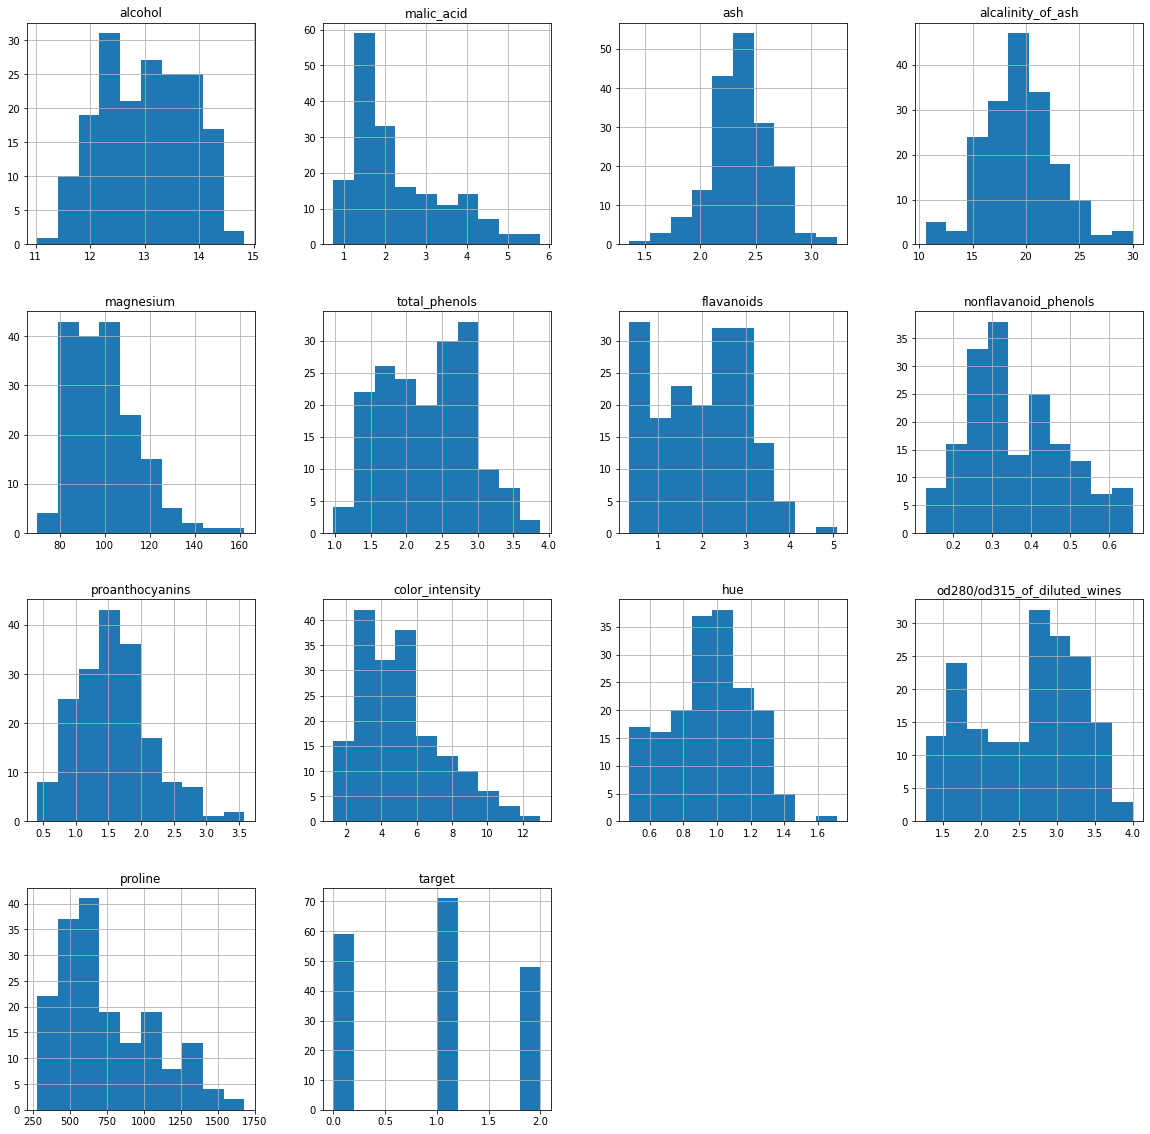

In [7]:
plt.rcParams["figure.figsize"] = (20,20)
df.hist()
plt.show()

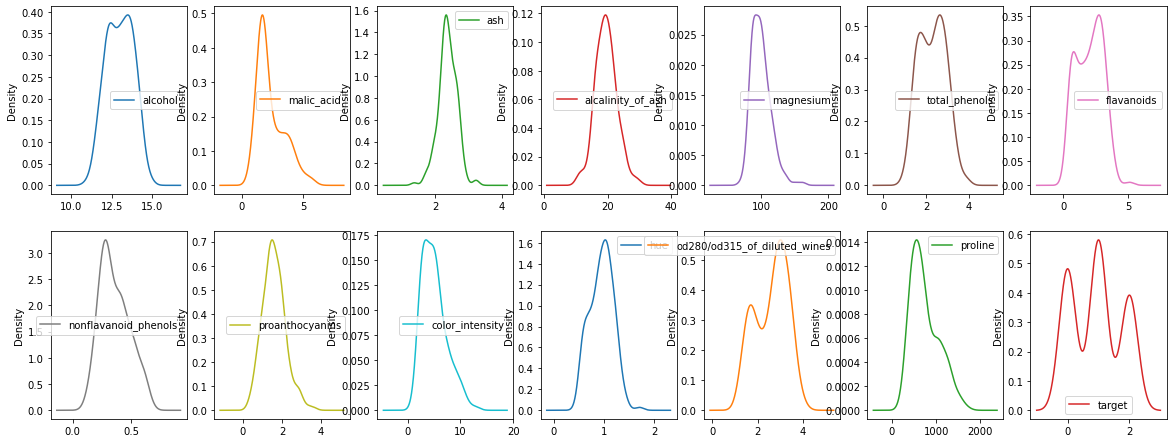

In [8]:
df.plot(kind='density', subplots=True, layout=(5,7), sharex=False)
plt.show()

In [9]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [10]:
df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [11]:
duplicate_values = df[df.duplicated()]
duplicate_values

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target


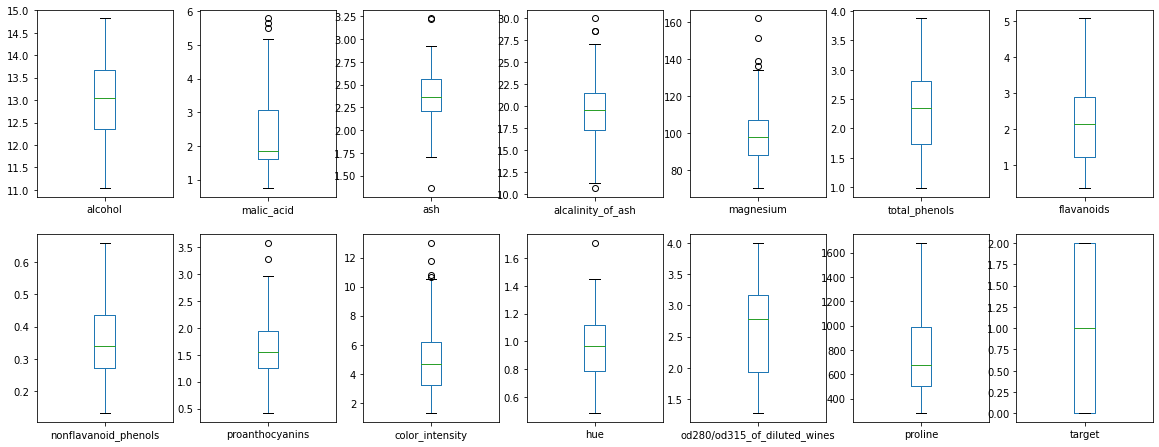

In [12]:
df.plot(kind='box', subplots=True, layout=(5,7), sharex=False, sharey=False)
plt.show()

In [13]:
correlation = df.corr(method='spearman')
columns = correlation.nlargest(5,'target').index
columns

Index(['target', 'alcalinity_of_ash', 'nonflavanoid_phenols', 'malic_acid',
       'color_intensity'],
      dtype='object')

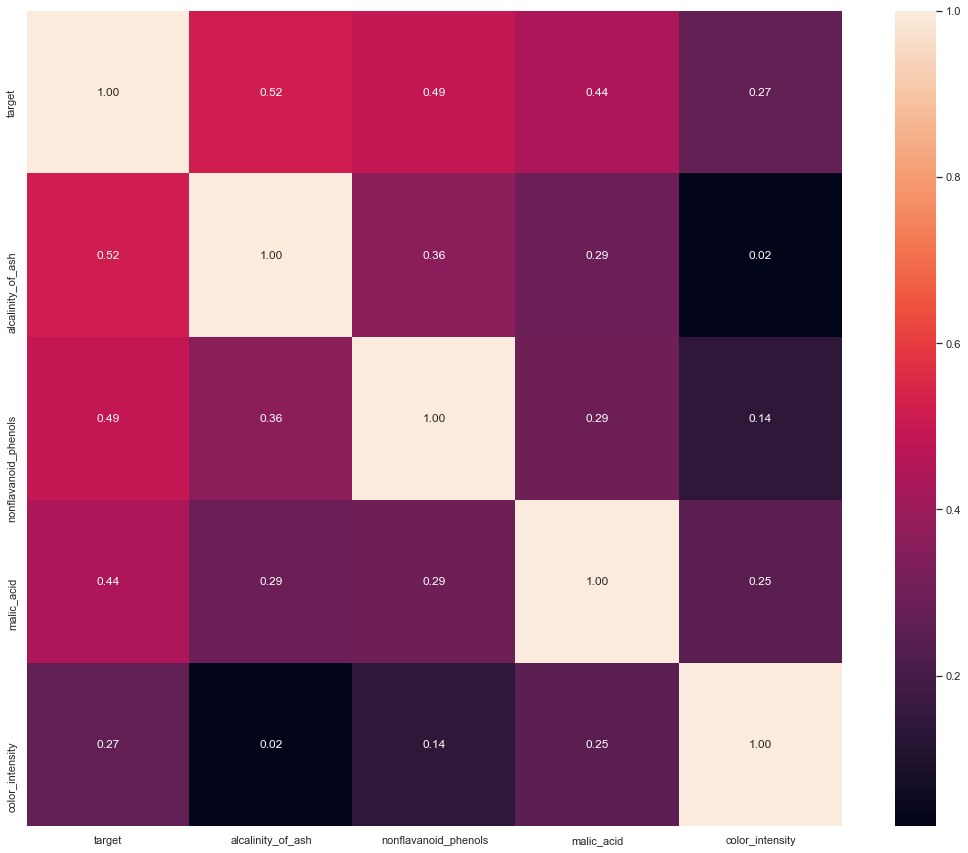

In [14]:
f = plt.figure(figsize=(19, 15))
correlation_map = np.corrcoef(df[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

##### Seperate dataset into features and output 

In [15]:
values = df.values

X = values[:,0:13]
Y = values[:,13]

##### Feature Scaling 

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # initialize scaler 
scaler.fit(X) # learn the necessary info from data 
X_scaled  = scaler.fit_transform(X) # apply scaling 

In [17]:
df_scaled = pd.DataFrame(X_scaled)

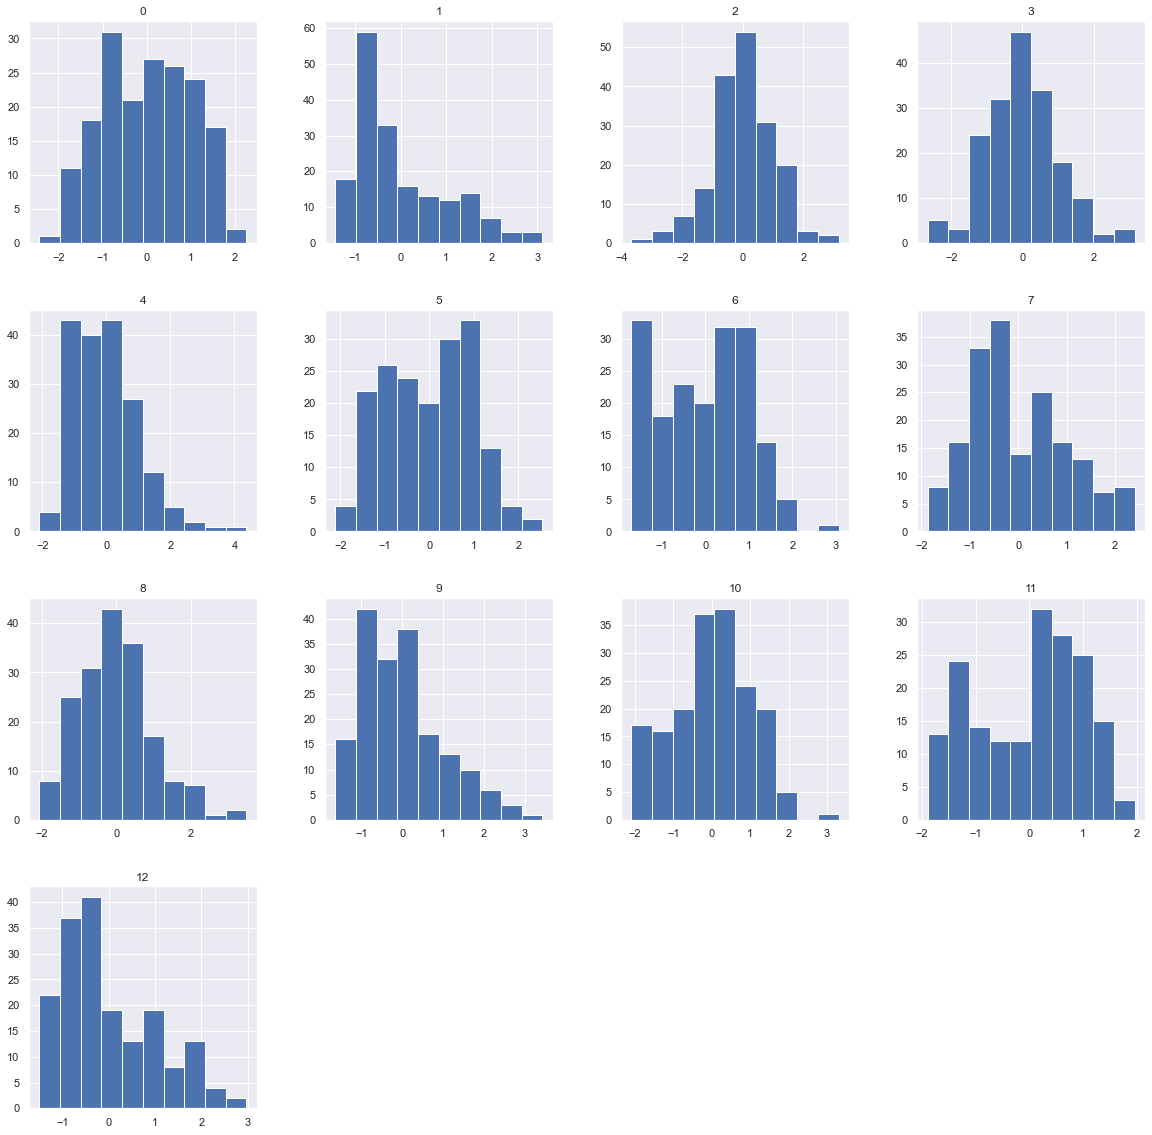

In [18]:
plt.rcParams["figure.figsize"] = (20,20)
df_scaled.hist()
plt.show()

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import f1_score # We choose f1 score because the data are unbalanced and f1 takes the combination of precision and recall



models = []
models.append(('LR',  LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(kernel="linear", gamma='auto')))
models.append(('RF',  RandomForestClassifier()))
models.append(('GB',  GradientBoostingClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('AdaBoost',  AdaBoostClassifier()))
models.append(('ANN', MLPClassifier()))


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scoring = "f1_macro"

results_no_noise={}

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, X_scaled, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))
    results_no_noise[i]=cv_results.mean()

 LR: 0.987958 (+/- 0.022741)
LDA: 0.989599 (+/- 0.022268)
kNN: 0.969720 (+/- 0.035930)
 DT: 0.901032 (+/- 0.073708)
 NB: 0.979032 (+/- 0.033058)
SVM: 0.960029 (+/- 0.034670)
 RF: 0.980267 (+/- 0.028518)
 GB: 0.941681 (+/- 0.050611)
XGB: 0.969199 (+/- 0.038694)
AdaBoost: 0.896567 (+/- 0.096544)
ANN: 0.980437 (+/- 0.029534)


In [20]:
# Multiple results from cross validation for statistical tests

In [21]:
# Create a function that assembles cross validation results  
def cv_res (results):  
    
    a = [5,10,15,20,25,30,35,40,45,50]

    x = []

    sum = 0

    for i , result in enumerate(results):
       
        sum += result

        if i+1 in a: 
            x.append(sum/5)
            sum=0
    return x

In [22]:
m =[]
for i in models:
    m.append(i[0])

f1_results = pd.DataFrame()


for i, m in enumerate(m):
    f1_results[str(m)] = cv_res(results[i])

f1_results    

,LR,LDA,kNN,DT,NB,SVM,RF,GB,XGB,AdaBoost,ANN
0,0.989744,0.988811,0.957265,0.900084,0.989495,0.943662,0.979239,0.956690,0.977622,0.920919,0.976959
1,0.988811,0.986555,0.978555,0.900029,0.967273,0.975366,0.977622,0.919602,0.966511,0.935545,0.977778
2,0.988811,0.966703,0.967366,0.807465,0.967801,0.943471,0.945451,0.860221,0.932166,0.876102,0.988811
3,0.989744,1.000000,0.979239,0.938547,0.988811,0.956198,0.989744,0.966829,0.989744,0.911694,0.966703
4,0.978555,0.988148,0.957920,0.890385,0.978355,0.955563,0.978555,0.968099,0.978555,0.902627,0.977622
5,0.988811,0.988811,0.977208,0.930370,0.977008,0.964424,1.000000,0.964893,0.961639,0.874008,0.988148
6,0.989744,0.988811,0.947541,0.922191,0.988811,0.967366,0.978555,0.936253,0.956495,0.841084,0.989744
7,0.988148,0.988148,0.988148,0.965545,0.967138,0.962328,0.988148,0.967387,0.976027,0.935207,0.974180
8,0.989744,1.000000,0.989744,0.879842,0.989495,0.988811,0.989744,0.946248,0.977622,0.855036,0.988811
9,0.987464,1.000000,0.954216,0.875862,0.976135,0.943105,0.975613,0.930590,0.975613,0.913453,0.975613


In [23]:
f1_results_other_algorithms=f1_results.drop(columns=['AdaBoost']).mean(axis=1)
f1_results_other_algorithms

0    0.965957
1    0.963810
2    0.936827
3    0.976556
4    0.965176
5    0.974131
6    0.966551
7    0.976520
8    0.974006
9    0.959421
dtype: float64

## Noise without noisify 

In [24]:
# Create a function to add noise    
def add_noise(X,p):
    if p>0:
        X_n = pd.DataFrame(X)
        a,b = X.shape
        c = round(a*p)

        for k in range(b):
            mean = X_n[k].mean()
            sd = X_n[k].std()

            for i in range(0,a,int(a/c)):
                X_n.iloc[i,k] = np.random.normal(mean,sd)

        return X_n.values

    else:
        return X

#### Add noise 5%

In [25]:
X2_noise1 = add_noise(X_scaled, p=0.05)

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import f1_score # We choose f1 score because the data are unbalanced and f1 takes the combination of precision and recall



models = []
models.append(('LR',  LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(kernel="linear", gamma='auto')))
models.append(('RF',  RandomForestClassifier()))
models.append(('GB',  GradientBoostingClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('AdaBoost',  AdaBoostClassifier()))
models.append(('ANN', MLPClassifier()))


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scoring = "f1_macro"


results_noise2_1={}

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, X2_noise1, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))
    results_noise2_1[i]=cv_results.mean()

 LR: 0.944415 (+/- 0.062791)
LDA: 0.947799 (+/- 0.056031)
kNN: 0.944675 (+/- 0.058594)
 DT: 0.860861 (+/- 0.076123)
 NB: 0.935144 (+/- 0.066337)
SVM: 0.897060 (+/- 0.076600)
 RF: 0.941423 (+/- 0.055262)
 GB: 0.925488 (+/- 0.060649)
XGB: 0.917514 (+/- 0.069470)
AdaBoost: 0.858728 (+/- 0.096076)
ANN: 0.937541 (+/- 0.060390)


In [27]:
m =[]
for i in models:
    m.append(i[0])

f1_results_noise_1 = pd.DataFrame()


for i, m in enumerate(m):
    f1_results_noise_1[str(m)] = cv_res(results[i])

f1_results_noise_1

,LR,LDA,kNN,DT,NB,SVM,RF,GB,XGB,AdaBoost,ANN
0,0.969109,0.979487,0.968298,0.889240,0.979487,0.946239,0.968298,0.968982,0.956255,0.894007,0.978555
1,0.920582,0.917968,0.932698,0.807498,0.887468,0.870211,0.910501,0.909911,0.866227,0.822019,0.907136
2,0.967273,0.955421,0.945828,0.845707,0.944646,0.877437,0.946263,0.914531,0.891096,0.876558,0.957016
3,0.934216,0.955286,0.945030,0.888182,0.944146,0.898642,0.945030,0.945030,0.934900,0.873740,0.910363
4,0.935995,0.934400,0.946252,0.891514,0.924260,0.911608,0.925876,0.936802,0.914081,0.886190,0.913203
5,0.948355,0.948355,0.929981,0.884860,0.918443,0.906125,0.950494,0.917743,0.925921,0.842750,0.938099
6,0.915291,0.925547,0.914542,0.831854,0.899730,0.821886,0.925030,0.902998,0.888863,0.809504,0.934659
7,0.976296,0.963148,0.976296,0.892975,0.966347,0.953020,0.965791,0.944198,0.945156,0.864132,0.949180
8,0.921317,0.931548,0.943400,0.820344,0.943333,0.898126,0.933077,0.890199,0.930571,0.842999,0.943400
9,0.955718,0.966829,0.944424,0.856438,0.943579,0.887309,0.943867,0.924487,0.922065,0.875378,0.943797


In [28]:
f1_results_noise_1_other_algorithms=f1_results_noise_1.drop(columns=['AdaBoost']).mean(axis=1)
f1_results_noise_1_other_algorithms

0    0.960395
1    0.893020
2    0.924522
3    0.930082
4    0.923399
5    0.926838
6    0.896040
7    0.953241
8    0.915531
9    0.928851
dtype: float64

#### Add noise 10%

In [29]:
X2_noise2 = add_noise(X_scaled,p=.1)

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import f1_score # We choose f1 score because the data are unbalanced and f1 takes the combination of precision and recall



models = []
models.append(('LR',  LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(kernel="linear", gamma='auto')))
models.append(('RF',  RandomForestClassifier()))
models.append(('GB',  GradientBoostingClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('AdaBoost',  AdaBoostClassifier()))
models.append(('ANN', MLPClassifier()))


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scoring = "f1_macro"


results_noise2_2={}

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, X2_noise2, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))
    results_noise2_2[i]=cv_results.mean()

 LR: 0.847266 (+/- 0.097643)
LDA: 0.861699 (+/- 0.091753)
kNN: 0.858864 (+/- 0.085348)
 DT: 0.797051 (+/- 0.094281)
 NB: 0.846888 (+/- 0.095270)
SVM: 0.832184 (+/- 0.099030)
 RF: 0.884684 (+/- 0.081097)
 GB: 0.857936 (+/- 0.093938)
XGB: 0.864143 (+/- 0.086884)
AdaBoost: 0.777871 (+/- 0.109469)
ANN: 0.855034 (+/- 0.098683)


In [31]:
m =[]
for i in models:
    m.append(i[0])

f1_results_noise_2 = pd.DataFrame()


for i, m in enumerate(m):
    f1_results_noise_2[str(m)] = cv_res(results[i])

f1_results_noise_2

,LR,LDA,kNN,DT,NB,SVM,RF,GB,XGB,AdaBoost,ANN
0,0.904304,0.916348,0.901403,0.832763,0.903154,0.869846,0.936544,0.913561,0.901774,0.789537,0.914809
1,0.790947,0.789735,0.829098,0.768761,0.783055,0.746682,0.821117,0.816117,0.836840,0.722439,0.800290
2,0.862760,0.863720,0.846424,0.770344,0.835179,0.827882,0.859922,0.832675,0.841577,0.726422,0.864824
3,0.831141,0.856402,0.876631,0.823235,0.876458,0.836402,0.890172,0.881922,0.889017,0.797022,0.844483
4,0.825431,0.847202,0.857469,0.757679,0.845678,0.824461,0.868456,0.834805,0.847978,0.780532,0.824863
5,0.874896,0.852977,0.853643,0.808738,0.847821,0.874285,0.894759,0.872079,0.867571,0.795981,0.844338
6,0.823886,0.846106,0.826320,0.738160,0.812389,0.801022,0.861195,0.792767,0.835026,0.737103,0.825122
7,0.885622,0.898135,0.894137,0.829312,0.875836,0.897682,0.901363,0.902392,0.899196,0.836827,0.885389
8,0.855667,0.868640,0.871294,0.834410,0.845917,0.821559,0.913206,0.878961,0.889340,0.799012,0.891543
9,0.818011,0.877721,0.832217,0.807110,0.843392,0.822014,0.900106,0.854075,0.833110,0.793834,0.854675


In [32]:
f1_results_noise_2_other_algorithms=f1_results_noise_2.drop(columns=['AdaBoost']).mean(axis=1)
f1_results_noise_2_other_algorithms

0    0.899451
1    0.798264
2    0.840531
3    0.860586
4    0.833402
5    0.859111
6    0.816200
7    0.886906
8    0.867054
9    0.844243
dtype: float64

#### Add noise 15%

In [33]:
X2_noise3 = add_noise(X_scaled,p=.15)

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import f1_score # We choose f1 score because the data are unbalanced and f1 takes the combination of precision and recall



models = []
models.append(('LR',  LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(kernel="linear", gamma='auto')))
models.append(('RF',  RandomForestClassifier()))
models.append(('GB',  GradientBoostingClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('AdaBoost',  AdaBoostClassifier()))
models.append(('ANN', MLPClassifier()))


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scoring = "f1_macro"


results_noise2_3={}

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, X2_noise3, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))
    results_noise2_3[i]=cv_results.mean()

 LR: 0.801299 (+/- 0.098585)
LDA: 0.806003 (+/- 0.094634)
kNN: 0.785406 (+/- 0.082894)
 DT: 0.707200 (+/- 0.113233)
 NB: 0.796904 (+/- 0.094259)
SVM: 0.759541 (+/- 0.103346)
 RF: 0.779325 (+/- 0.092111)
 GB: 0.775197 (+/- 0.096122)
XGB: 0.780025 (+/- 0.094417)
AdaBoost: 0.710546 (+/- 0.098912)
ANN: 0.758762 (+/- 0.097613)


In [35]:
m =[]
for i in models:
    m.append(i[0])

f1_results_noise_3 = pd.DataFrame()


for i, m in enumerate(m):
    f1_results_noise_3[str(m)] = cv_res(results[i])

f1_results_noise_3

,LR,LDA,kNN,DT,NB,SVM,RF,GB,XGB,AdaBoost,ANN
0,0.895077,0.895077,0.793314,0.747733,0.862003,0.838139,0.848374,0.860997,0.850524,0.793912,0.849040
1,0.698963,0.698155,0.774696,0.620846,0.744378,0.651042,0.713239,0.699888,0.715315,0.695945,0.686809
2,0.836208,0.858065,0.804470,0.757027,0.793024,0.838698,0.776469,0.795240,0.794093,0.685351,0.814441
3,0.752526,0.743552,0.747029,0.709266,0.772314,0.732209,0.779191,0.754584,0.779643,0.681131,0.707165
4,0.763990,0.796979,0.765919,0.678608,0.774358,0.749567,0.744456,0.772807,0.788015,0.686435,0.728377
5,0.839877,0.828639,0.810796,0.744143,0.810623,0.723615,0.812679,0.760279,0.818605,0.642757,0.784808
6,0.774633,0.751937,0.741439,0.607448,0.769644,0.723783,0.727155,0.725937,0.736394,0.678958,0.698617
7,0.856790,0.856790,0.833086,0.803519,0.836189,0.800664,0.826930,0.864732,0.809787,0.772193,0.810553
8,0.807123,0.816724,0.819322,0.694793,0.800299,0.792768,0.778208,0.753007,0.768395,0.708235,0.769921
9,0.787797,0.814110,0.763987,0.708615,0.806206,0.744921,0.786550,0.764502,0.739481,0.760544,0.737893


In [36]:
f1_results_noise_3_other_algorithms=f1_results_noise_3.drop(columns=['AdaBoost']).mean(axis=1)
f1_results_noise_3_other_algorithms

0    0.844028
1    0.700333
2    0.806774
3    0.747748
4    0.756308
5    0.793406
6    0.725699
7    0.829904
8    0.780056
9    0.765406
dtype: float64

#### Add noise 20%

In [37]:
X2_noise4 = add_noise(X_scaled,p=.2)

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import f1_score # We choose f1 score because the data are unbalanced and f1 takes the combination of precision and recall



models = []
models.append(('LR',  LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(kernel="linear", gamma='auto')))
models.append(('RF',  RandomForestClassifier()))
models.append(('GB',  GradientBoostingClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('AdaBoost',  AdaBoostClassifier()))
models.append(('ANN', MLPClassifier()))


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scoring = "f1_macro"


results_noise2_4={}

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, X2_noise4, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))
    results_noise2_4[i]=cv_results.mean()

 LR: 0.672035 (+/- 0.105436)
LDA: 0.659516 (+/- 0.109763)
kNN: 0.661877 (+/- 0.106646)
 DT: 0.563755 (+/- 0.141135)
 NB: 0.636443 (+/- 0.109266)
SVM: 0.649588 (+/- 0.120670)
 RF: 0.647218 (+/- 0.108518)
 GB: 0.657015 (+/- 0.109254)
XGB: 0.644769 (+/- 0.103082)
AdaBoost: 0.596665 (+/- 0.125448)
ANN: 0.623762 (+/- 0.109427)


In [39]:
m =[]
for i in models:
    m.append(i[0])

f1_results_noise_4 = pd.DataFrame()


for i, m in enumerate(m):
    f1_results_noise_4[str(m)] = cv_res(results[i])

f1_results_noise_4

,LR,LDA,kNN,DT,NB,SVM,RF,GB,XGB,AdaBoost,ANN
0,0.763303,0.750828,0.700149,0.549992,0.699275,0.769622,0.722147,0.715287,0.713731,0.705115,0.701759
1,0.586883,0.563196,0.640118,0.628724,0.605967,0.535328,0.581496,0.563494,0.582378,0.600703,0.570384
2,0.707068,0.681919,0.662462,0.537576,0.619295,0.663872,0.640194,0.666909,0.672895,0.565518,0.594570
3,0.635013,0.633425,0.661194,0.584837,0.644890,0.633460,0.633759,0.642617,0.636454,0.624518,0.615397
4,0.667361,0.664466,0.674940,0.547927,0.654242,0.665696,0.633289,0.644640,0.636324,0.559976,0.639679
5,0.692763,0.701176,0.614253,0.587779,0.616483,0.625304,0.664982,0.677613,0.658517,0.583462,0.653519
6,0.589138,0.541157,0.599405,0.521325,0.565592,0.546643,0.561339,0.612095,0.532566,0.540492,0.551019
7,0.743225,0.738281,0.711983,0.691738,0.713865,0.734899,0.724107,0.761248,0.703570,0.658628,0.657883
8,0.717148,0.705631,0.754711,0.575772,0.689663,0.670715,0.663022,0.650644,0.670829,0.620276,0.675812
9,0.618447,0.615078,0.599551,0.411885,0.555157,0.650335,0.647850,0.635606,0.640430,0.507962,0.577594


In [40]:
#f1_results_noise_4.mean().drop
f1_results_noise_4_other_algorithms=f1_results_noise_4.drop(columns=['AdaBoost']).mean(axis=1)
f1_results_noise_4_other_algorithms

0    0.708609
1    0.585797
2    0.644676
3    0.632105
4    0.642856
5    0.649239
6    0.562028
7    0.718080
8    0.677395
9    0.595193
dtype: float64

In [41]:
f1_consolidated_results2 = pd.DataFrame()
f1_consolidated_results2 = f1_consolidated_results2.append(results_no_noise, ignore_index=True)
f1_consolidated_results2 = f1_consolidated_results2.append(results_noise2_1, ignore_index=True)
f1_consolidated_results2 = f1_consolidated_results2.append(results_noise2_2, ignore_index=True)
f1_consolidated_results2 = f1_consolidated_results2.append(results_noise2_3, ignore_index=True)
f1_consolidated_results2 = f1_consolidated_results2.append(results_noise2_4, ignore_index=True)

In [42]:
new_column_values = ['Without Noise','Noise 5%','Noise 10%','Noise 15%','Noise 20%']

f1_consolidated_results2 ["Status"] = new_column_values 

f1_consolidated_results2 

,ANN,AdaBoost,DT,GB,LDA,LR,NB,RF,SVM,XGB,kNN,Status
0,0.980437,0.896567,0.901032,0.941681,0.989599,0.987958,0.979032,0.980267,0.960029,0.969199,0.969720,Without Noise
1,0.937541,0.858728,0.860861,0.925488,0.947799,0.944415,0.935144,0.941423,0.897060,0.917514,0.944675,Noise 5%
2,0.855034,0.777871,0.797051,0.857936,0.861699,0.847266,0.846888,0.884684,0.832184,0.864143,0.858864,Noise 10%
3,0.758762,0.710546,0.707200,0.775197,0.806003,0.801299,0.796904,0.779325,0.759541,0.780025,0.785406,Noise 15%
4,0.623762,0.596665,0.563755,0.657015,0.659516,0.672035,0.636443,0.647218,0.649588,0.644769,0.661877,Noise 20%


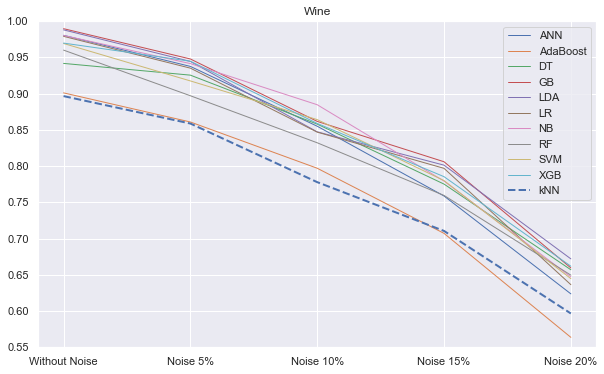

In [43]:
# Importing packages
import matplotlib.pyplot as plt


# Plot a simple line chart
fig, g = plt.subplots(figsize = (10,6))
sns.color_palette("rocket", as_cmap=True)
plt.plot(f1_consolidated_results2 ['Status'],f1_consolidated_results2.drop(columns=['Status','AdaBoost'],axis=1),linewidth=1)
plt.plot(f1_consolidated_results2 ['Status'],f1_consolidated_results2['AdaBoost'],'--',linewidth=2)
plt.legend(f1_consolidated_results2.drop(columns=['Status'],axis=1),loc="upper right")
plt.ylim(0.55,1)
plt.title("Wine")
plt.show()

In [44]:
#sns.lineplot(data=f1_consolidated_results2)

### T-test Statistic 

In [45]:
from scipy.stats import ttest_ind as ttest

Hypothesis

H0: Noise does not effect the models efficiency f1_no_noise = f1_noise

H1: There is effect of noise in the models efficiency f1_no_noise <> f1_noise

#### T-test for data without noise

In [46]:
t_value,p_value=ttest(f1_results['AdaBoost'],f1_results_other_algorithms)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the f1 score is not the same at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the f1 score is the same at %.2f level of significance.''' %alpha)


Test statistic is -6.231614
p-value for two tailed test is 0.000007
Since p-value(=0.000007) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the f1 score is not the same at 0.05 level of significance.


### Cohen's d effect 

In [47]:
import math 
# function to calculate Cohen's d for independent samples
def cohend(d1, d2):
# calculate the size of samples
    n1, n2 = len(d1), len(d2)
    # calculate the variance of the samples
    s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
    # calculate the pooled standard deviation
    s = math.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    # calculate the means of the samples
    u1, u2 = np.mean(d1), np.mean(d2)
    # calculate the effect size
    return (u1 - u2) / s

In [48]:
cohend(f1_results['AdaBoost'].tolist(), f1_results_other_algorithms.tolist())

-2.7868626026980112

### T-test for 5% noise

#### Compare with AdaBoost

In [49]:
t_value,p_value=ttest(f1_results['AdaBoost'],f1_results_noise_1['AdaBoost'])

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


Test statistic is 2.752544
p-value for two tailed test is 0.013101
Since p-value(=0.013101) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at 0.05 level of significance.


#### Compare with other algorithms

In [50]:
t_value,p_value=ttest(f1_results_other_algorithms,f1_results_noise_1_other_algorithms)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


Test statistic is 5.304032
p-value for two tailed test is 0.000048
Since p-value(=0.000048) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at 0.05 level of significance.


### T-test for 10% noise

#### Compare with AdaBoost

In [51]:
t_value,p_value=ttest(f1_results['AdaBoost'],f1_results_noise_2['AdaBoost'])

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


Test statistic is 7.543320
p-value for two tailed test is 0.000001
Since p-value(=0.000001) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at 0.05 level of significance.


#### Compare with other algorithms

In [52]:
t_value,p_value=ttest(f1_results_other_algorithms,f1_results_noise_2_other_algorithms)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


Test statistic is 11.074118
p-value for two tailed test is 0.000000
Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at 0.05 level of significance.


### T-test for 15% noise

#### Compare with AdaBoost

In [53]:
t_value,p_value=ttest(f1_results['AdaBoost'],f1_results_noise_3['AdaBoost'])

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


Test statistic is 10.018274
p-value for two tailed test is 0.000000
Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at 0.05 level of significance.


#### Compare with other algorithms

In [54]:
t_value,p_value=ttest(f1_results_other_algorithms,f1_results_noise_3_other_algorithms)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


Test statistic is 12.939471
p-value for two tailed test is 0.000000
Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at 0.05 level of significance.


### T-test for 20% noise

#### Compare with AdaBoost

In [55]:
t_value,p_value=ttest(f1_results['AdaBoost'],f1_results_noise_4['AdaBoost'])

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


Test statistic is 14.163513
p-value for two tailed test is 0.000000
Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at 0.05 level of significance.


#### Compare with other algorithms

In [56]:
t_value,p_value=ttest(f1_results_other_algorithms,f1_results_noise_4_other_algorithms)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


Test statistic is 19.602728
p-value for two tailed test is 0.000000
Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at 0.05 level of significance.


### Kolmogorov-Smirnov 

two-sided: The null hypothesis is that the two distributions are identical, F(x)=G(x) for all x; the alternative is that they are not identical.

less: The null hypothesis is that F(x) >= G(x) for all x; the alternative is that F(x) < G(x) for at least one x.

greater: The null hypothesis is that F(x) <= G(x) for all x; the alternative is that F(x) > G(x) for at least one x.

In [57]:
# Hypothesis

# H0: Noise does not effect the models efficiency of AdaBoost more than other algorithms f1_no_noise_AB = f1_noise_mean_of_the_rest

# H1:  Noise does effect the models efficiency of AdaBoost more than other algorithms f1_no_noise_AB <> f1_noise_mean_of_the_rest



### K-S for 5% noise

In [58]:
from scipy.stats import ks_2samp  


#perform Kolmogorov-Smirnov test
t_value,p_value = ks_2samp(f1_results['AdaBoost']-f1_results_noise_1['AdaBoost'], f1_results.drop(columns=['AdaBoost']).mean(axis=1)-f1_results_noise_1.drop(columns=['AdaBoost']).mean(axis=1))


print('p-value for two tailed KS test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency is different for AdaBoost at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency is the same for AdaBoost at %.2f level of significance.''' %alpha)

p-value for two tailed KS test is 0.417524
Since p-value(=0.417524) > alpha(=0.05) We do not reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency is the same for AdaBoost at 0.05 level of significance.


In [59]:
#np.mean(f1_results['AdaBoost']-f1_results_noise_1['AdaBoost'])
#np.mean(f1_results.drop(columns=['AdaBoost']).mean(axis=1)-f1_results_noise1.drop(columns=['AdaBoost']).mean(axis=1))

### K-S for 10% noise

In [60]:
from scipy.stats import ks_2samp  


#perform Kolmogorov-Smirnov test
t_value,p_value = ks_2samp(f1_results['AdaBoost']-f1_results_noise_2['AdaBoost'], f1_results.drop(columns=['AdaBoost']).mean(axis=1)-f1_results_noise_2.drop(columns=['AdaBoost']).mean(axis=1))


print('p-value for two tailed KS test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency is different for AdaBoost at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency is the same for AdaBoost at %.2f level of significance.''' %alpha)

p-value for two tailed KS test is 0.994458
Since p-value(=0.994458) > alpha(=0.05) We do not reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency is the same for AdaBoost at 0.05 level of significance.


In [61]:
#np.mean(f1_results['AdaBoost']-f1_results_noise_2['AdaBoost'])
#np.mean(f1_results.drop(columns=['AdaBoost']).mean(axis=1)-f1_results_noise_2.drop(columns=['AdaBoost']).mean(axis=1))

### K-S for 15% noise

In [62]:
from scipy.stats import ks_2samp  


#perform Kolmogorov-Smirnov test
t_value,p_value = ks_2samp(f1_results['AdaBoost']-f1_results_noise_3['AdaBoost'], f1_results.drop(columns=['AdaBoost']).mean(axis=1)-f1_results_noise_3.drop(columns=['AdaBoost']).mean(axis=1))


print('p-value for two tailed KS test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency is different for AdaBoost at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency is the same for AdaBoost at %.2f level of significance.''' %alpha)

p-value for two tailed KS test is 0.994458
Since p-value(=0.994458) > alpha(=0.05) We do not reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency is the same for AdaBoost at 0.05 level of significance.


In [63]:
#np.mean(f1_results['AdaBoost']-f1_results_noise_3['AdaBoost'])
#np.mean(f1_results.drop(columns=['AdaBoost']).mean(axis=1)-f1_results_noise_3.drop(columns=['AdaBoost']).mean(axis=1))

### K-S for 20% noise

In [64]:
from scipy.stats import ks_2samp  


#perform Kolmogorov-Smirnov test
t_value,p_value = ks_2samp(f1_results['AdaBoost']-f1_results_noise_4['AdaBoost'], f1_results.drop(columns=['AdaBoost']).mean(axis=1)-f1_results_noise_4.drop(columns=['AdaBoost']).mean(axis=1))


print('p-value for two tailed KS test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency is different for AdaBoost at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency is the same for AdaBoost at %.2f level of significance.''' %alpha)

p-value for two tailed KS test is 0.786930
Since p-value(=0.786930) > alpha(=0.05) We do not reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency is the same for AdaBoost at 0.05 level of significance.


In [65]:
#np.mean(f1_results['AdaBoost']-f1_results_noise_4['AdaBoost'])
#np.mean(f1_results.drop(columns=['AdaBoost']).mean(axis=1)-f1_results_noise_4.drop(columns=['AdaBoost']).mean(axis=1))

## Pearson correlation 

### Adaboost Table

In [66]:
#create table
d1 = {
    'AdaBoost_initial': f1_results['AdaBoost'],
    'AdaBoost_noise_1': f1_results_noise_1['AdaBoost'],
    'AdaBoost_noise_2': f1_results_noise_2['AdaBoost'],
    'AdaBoost_noise_3': f1_results_noise_3['AdaBoost'],
    'AdaBoost_noise_4': f1_results_noise_4['AdaBoost']
    }
Adaboost_table = pd.DataFrame(d1)
Adaboost_table

,AdaBoost_initial,AdaBoost_noise_1,AdaBoost_noise_2,AdaBoost_noise_3,AdaBoost_noise_4
0,0.920919,0.894007,0.789537,0.793912,0.705115
1,0.935545,0.822019,0.722439,0.695945,0.600703
2,0.876102,0.876558,0.726422,0.685351,0.565518
3,0.911694,0.873740,0.797022,0.681131,0.624518
4,0.902627,0.886190,0.780532,0.686435,0.559976
5,0.874008,0.842750,0.795981,0.642757,0.583462
6,0.841084,0.809504,0.737103,0.678958,0.540492
7,0.935207,0.864132,0.836827,0.772193,0.658628
8,0.855036,0.842999,0.799012,0.708235,0.620276
9,0.913453,0.875378,0.793834,0.760544,0.507962


In [67]:
# Correlation between f1score of Adaboost and noise increase 

In [68]:
a = Adaboost_table.iloc[:,:1].squeeze()
     
b = Adaboost_table['AdaBoost_noise_1'].squeeze()

c = Adaboost_table['AdaBoost_noise_2'].squeeze()
  
d = Adaboost_table['AdaBoost_noise_3'].squeeze()    

e = Adaboost_table['AdaBoost_noise_4'].squeeze()

f1 = pd.concat([a,b,c,d,e])

f1 = pd.DataFrame(f1)

f1.rename(columns = {0:'f1'}, inplace = True)
f1.reset_index(drop=True, inplace=True)



noise_1 = [1 for i in range(10)]
noise_2 = [2 for i in range(10)]
noise_3 = [3 for i in range(10)]
noise_4 = [4 for i in range(10)]
noise_5 = [5 for i in range(10)]

noise = noise_1+noise_2+noise_3+noise_4+noise_5

noise = pd.DataFrame(noise)

noise.rename(columns = {0:'noise'}, inplace = True)
noise.reset_index(drop=True, inplace=True)

df_cor = pd.concat([f1,noise], axis=1)

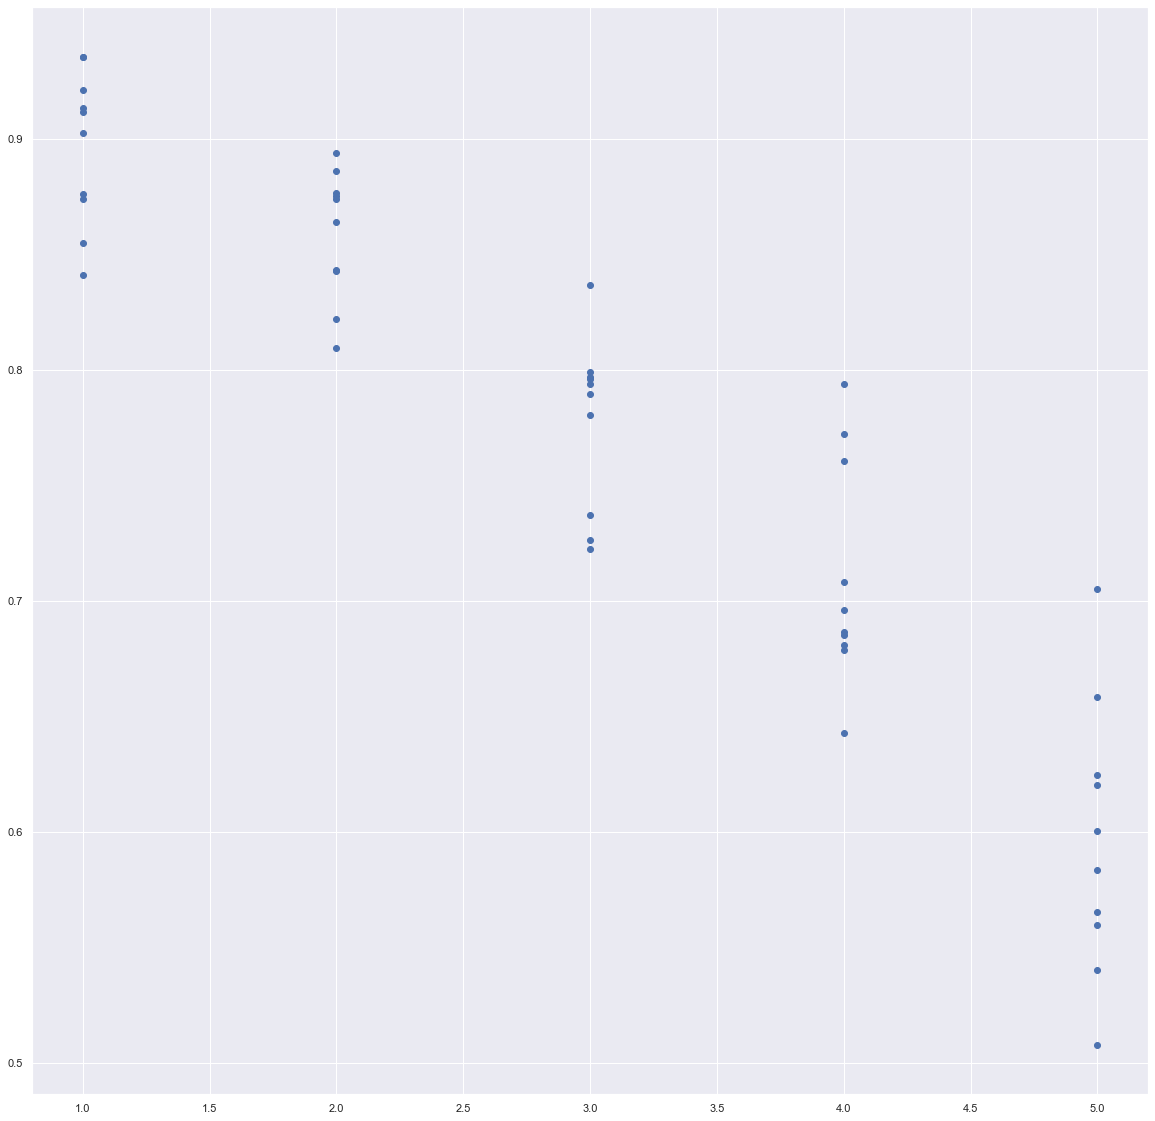

In [69]:
plt.scatter(df_cor.iloc[:,1].values.tolist(), df_cor.iloc[:,0].values.tolist())

In [70]:
from scipy.stats import pearsonr

# Returns Pearson’s correlation coefficient,2-tailed p-value)


# Hypothesis

# H0: ρ = 0

# H1: ρ <> 0


corr, p_value = pearsonr(df_cor.iloc[:,1].values.tolist(), df_cor.iloc[:,0].values.tolist())

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that there is correlation %.2f at %.2f level of significance.'''%(corr,alpha))

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that there is not correlation at %.2f level of significance.''' %alpha)
print(corr)

Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that there is correlation -0.92 at 0.05 level of significance.
-0.9233944626774688


In [71]:
# Correlation between f1score of Other algorithms mean value and noise increase 

In [72]:
#create table
d2 = {
    'Other_Algorithms_initial': f1_results_other_algorithms,
    'Other_Algorithms_noise_1': f1_results_noise_1_other_algorithms,
    'Other_Algorithms_noise_2': f1_results_noise_2_other_algorithms,
    'Other_Algorithms_noise_3': f1_results_noise_3_other_algorithms,
    'Other_Algorithms_noise_4': f1_results_noise_4_other_algorithms
    }
Other_Algorithms_table = pd.DataFrame(d2)
Other_Algorithms_table

,Other_Algorithms_initial,Other_Algorithms_noise_1,Other_Algorithms_noise_2,Other_Algorithms_noise_3,Other_Algorithms_noise_4
0,0.965957,0.960395,0.899451,0.844028,0.708609
1,0.963810,0.893020,0.798264,0.700333,0.585797
2,0.936827,0.924522,0.840531,0.806774,0.644676
3,0.976556,0.930082,0.860586,0.747748,0.632105
4,0.965176,0.923399,0.833402,0.756308,0.642856
5,0.974131,0.926838,0.859111,0.793406,0.649239
6,0.966551,0.896040,0.816200,0.725699,0.562028
7,0.976520,0.953241,0.886906,0.829904,0.718080
8,0.974006,0.915531,0.867054,0.780056,0.677395
9,0.959421,0.928851,0.844243,0.765406,0.595193


In [73]:
a = Other_Algorithms_table.iloc[:,:1].squeeze()
     
b = Other_Algorithms_table['Other_Algorithms_noise_1'].squeeze()

c = Other_Algorithms_table['Other_Algorithms_noise_2'].squeeze()
  
d = Other_Algorithms_table['Other_Algorithms_noise_3'].squeeze()    

e = Other_Algorithms_table['Other_Algorithms_noise_4'].squeeze()

f1 = pd.concat([a,b,c,d,e])

f1 = pd.DataFrame(f1)

f1.rename(columns = {0:'f1'}, inplace = True)
f1.reset_index(drop=True, inplace=True)


noise_1 = [1 for i in range(10)]
noise_2 = [2 for i in range(10)]
noise_3 = [3 for i in range(10)]
noise_4 = [4 for i in range(10)]
noise_5 = [5 for i in range(10)]

noise = noise_1+noise_2+noise_3+noise_4+noise_5

noise = pd.DataFrame(noise)

noise.rename(columns = {0:'noise'}, inplace = True)
noise.reset_index(drop=True, inplace=True)


df_cor = pd.concat([f1,noise], axis=1)

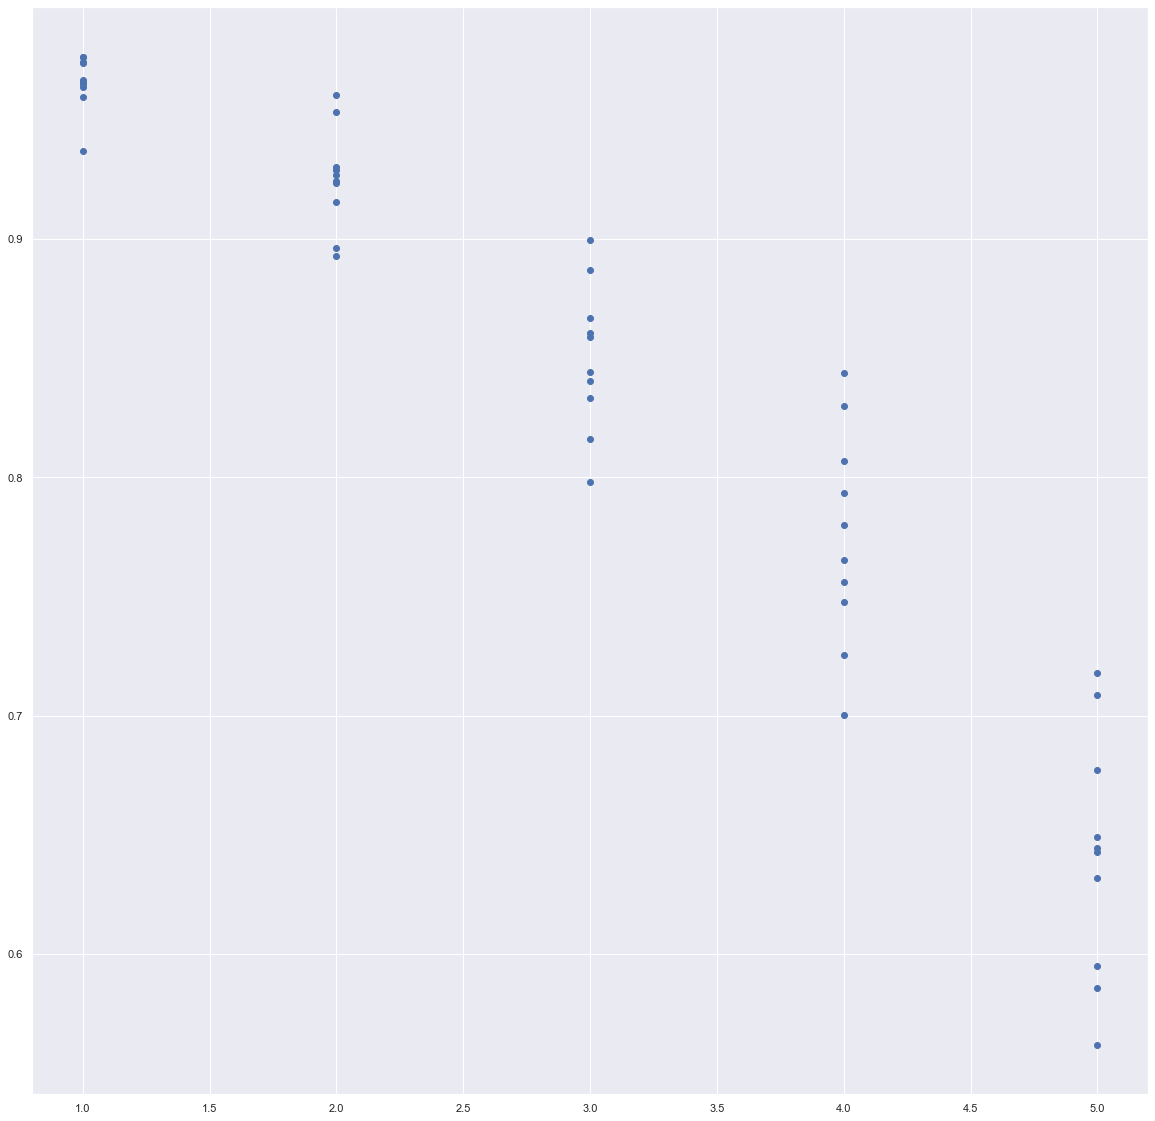

In [74]:
plt.scatter(df_cor.iloc[:,1].values.tolist(), df_cor.iloc[:,0].values.tolist())

In [75]:
from scipy.stats import pearsonr

# Returns Pearson’s correlation coefficient,2-tailed p-value)


# Hypothesis

# H0: ρ = 0

# H1: ρ <> 0


corr, p_value = pearsonr(df_cor.iloc[:,1].values.tolist(), df_cor.iloc[:,0].values.tolist())

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that there is correlation %.2f at %.2f level of significance.'''%(corr,alpha))

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that there is not correlation at %.2f level of significance.''' %alpha)
print(corr)

Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that there is correlation -0.94 at 0.05 level of significance.
-0.9413151028211824


Thus we can see from the effect size the of correlation that Adaboost is not more sensitive than other algorithms.